# Helt Python - Første økt

### Dette er notebooken knyttet til første økten i "Helt Python" serien vår.

## Introduksjon
Dette er et lavterksel tilbud for alle i SSB som ønsker og lære seg litt Python og prøve seg på å bruke notebooks.
Kurset er dynamisk og alle notatene som er og finne her vil utvikle seg etterhvert som vi gjennomfører det. Det lønner seg derfor og komme tilbake innimellom for og se hva som har forandret seg.

Nå starter vi med å beskrive noen begreper dere vill høre her og når dere begynner med å jobbe med programering


## Begrepsbeskrivelse
### Python
Python er navnet på et programerings språk. SAS er ett programerings språk. En av hovedforskjellene mellom SAS og python er at SAS er ett spesialisert språk for produksjon av statistikk. Det er også utviklet av et kommersielt firma, og styrt fra dem sentralt.

Python på den andre side er ikke utviklet spesielt for statistikk produksjon, det har eksistert som en generisk programeringsspråk siden 1987. Språket er ikke utviklet av en enkelt oragnisasjon, det startet med 1 person men er idag et åpent prosjekt som alle kan bidra til.

I de siste 15-20 år har utviklingen på python økt drastisk. Grunnet den åpene naturen til språket og den enkle syntaksen har Python blitt ett av yndlingsspråkene til "Data Scientists" og statistikere verden over.

### Notebooks
Jupyter Notebook er et "program" som lar deg skrive Python kode. Du kan tenke på det som SAS EG for python.

Den Store forskjellen mellom EG og Jupyter notebooks er at det bruker såkalte "Notebooks" som "program" for å skrive koden. Disse notebooksene har en rekke funksjoner som er meget praktiske, men også ganske uvante.

- Det første som du ser her er at du kan skrive tekst og kode i samme fil, men i seperate "bokser" (Såkalte celler, eller paragrapher). 
- Disse cellene can brukes til å dele opp koden din i biter som kan kjøres uavhengig av hverandre.
- Det neste er at når du skriver kode, kan du se resultatet av koden direkte under koden du skrev.
- Det er ingen log slik du er vant til fra SAS. 
    - Man kan lage en slik log, med det er noe mer avansert enn vi skal snakke om her
    
Det systemet som moderniseringsprosjektet jobber med som program for å lage og kjøre statistikk er også en Notebook-basert løsning.
    
Det er mye mer som kan sies om Notebooks men det kommer vi til å dekke mer omfattende i egne kurs.

### DataFrame
Dette er veldig enkelt. Dette er ett datasett, eller en tabel. Mye av arbeidet på Python er bassert på Engelsk, og DataFrame er det engelske begrepet som er brukt for datasett. 

### Library
Dette er en sammling kode som "noen" har skrevet og utviklet. Denne har så blitt gjort tilgjengelig, og kan lastes inn i dine programmer slik at du kan dra nytte af funksjonene uten å måte lage disse selv. Litt som en `%INCLUDE` i SAS, men mye mer organisert.

For å bruke et bibliotek (library) må de importeres inn i notebooken. Mer om dette om litt


## Installer kursmaterialet

Få tilgang til Jupyter Notebook
https://ssbno.sharepoint.com/sites/IT-service/SiteAssets/SitePages/Ofte-stilte-spC3B8rsmC3A5l/Hvordan%20bruke%20JupyterHub.docx?web=1

Når du har gjort dette, åpne ett nytt terminalbilde.

Skriv inn:

`git clone https://git-adm.ssb.no/scm/so19/helt_python.git`

Nå ligger alt kursmaterialet i en ny mappe, `helt_python`, på arbeidsområdet ditt.

Etterhvert som det legges ut nytt materiale eller det eksisterende oppdateres kan du enkelt få denne oppdateringen ved å gå til mappen ved å skrive 

`cd helt_python`

Som noen kjenner som linux komandoen for å navigere til en mappe. Når du er i denne mappen skriver du:

`git pull`

Med dette får du den til en vær tid siste oppdateringen av kurs materialet.

## Da starter vi

Det første vi må gjøre er og laste inn de bibliotekene vi skal bruke.
Det finnes utolig mang forskjellige biblioteker, og litt google søking vil la oss finne et bibliotek for nesten hva som helst.
I utgangspunktet for i dag skal vi bare bruke 4 biblioteker, som er meget standard for statistikk arbeid.

In [4]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import dapla as dp

Neste steg er å laste inn data. 
Her benyttes Pandas til og lese data fra disk, vi må oppgi:
* filtype : `read_csv`
* lokalisasjon på disk : `'Data/Titanic.csv'`

`dataset.head()` - viser de 5 første radene i datasettet

In [5]:
#df = pd.read_csv('Data/Titanic.csv')
df = dp.read_pandas('felles/kurs/helt_python/Titanic')
df.head()

DataAccessError: ('Fant ikke datasett', b'NOT_FOUND')

I Python så lagres hver variabel (eller kolonne) som en daa type:

* tekst - object
* hele tall - int64
* decimal tall - float64
* ukjente/blandede - object

*64 står for 64 bits lagring*

In [3]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

En måte å sikre at data lastes inn slik man vil er ved å bruke tilleggsargumenter når man laster inn filen.


* `sep = ','` - kolonner i filen er separert med et komma,
* `encoding = 'utf-8'` - Tekst i filen er lagte som utf-8 byte koder
* `dtype={'Pclass':'str'}` - denne angir hvilen type hver kollonne har. Nye kolloner separeres med ", kolonne:type

In [4]:
df = pd.read_csv('Data/Titanic.csv', sep = ',', encoding ='utf-8', dtype={'Pclass':'str'})
df.dtypes

PassengerId      int64
Survived         int64
Pclass          object
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

`datasett.describe()` - er en funksjon som gir et kjapt sammendrag av nøkkeltallene i hver kolonne.

In [5]:
df.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200


Ved å gi ett sett med kommaseparerte kolonne navn i `[[]]` etter navnet på datasettet kan du spessifisere hvilken kolonner du skal lese. dette fungerer med nesten alle funksjoner

In [6]:
df[['Age', 'Fare']].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


Noen kolonner kan inneholde tomme verdier, vi ønsker og finne ut hvor mange dette er. `.isnull()` sier noe om e verdi i en celle er tom. etterpå summerer vi antallet tomme med den matematiske funksjonen `.sum()`

In [7]:
df['Cabin'].isnull().sum()

687

For å si noe om undergrupper i dataen så gruperer vi med `.groupby('kolonne')` velger kolonner vi ønsker og se på. så gjennomfører en metode - i dette tilfelle gjennomsnitt.

In [8]:
by_class = df.groupby('Pclass')[['Age', 'Fare']].mean()
by_class.head()

,Age,Fare
Pclass,,
1,38.233441,84.154687
2,29.877630,20.662183
3,25.140620,13.675550


Vi ser at kolonnen i det nye datasettet heter det samme som de orginale kolonnene. Ønsker vi å koble disse tilbake til det orginale data settet bør vi endre navn. Dette gjøres med: 

`datasett.rename({gammelkollone : nykollonne}]`

In [9]:
by_class = by_class.rename({'Age': 'Mean_age', 'Fare': 'Mean_fare'}, axis=1)
by_class.head()

,Mean_age,Mean_fare
Pclass,,
1,38.233441,84.154687
2,29.877630,20.662183
3,25.140620,13.675550


Å koble data minner mye om hvordan det gjøres i SAS

In [10]:
df2 = pd.merge(df, by_class, on='Pclass', how='left')
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Mean_age,Mean_fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,25.140620,13.675550
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.233441,84.154687
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,25.140620,13.675550
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,38.233441,84.154687
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,25.140620,13.675550


Å lage nye kolonner i et datasett er så enkelt som å skrive:

`datasett['nykolonne'] = innholdet i ny kolonne`

In [11]:
df2['dist_age'] = df2['Age']-df2['Mean_age']
df2['dist_fare'] = df2['Fare']-df2['Mean_fare']
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Mean_age,Mean_fare,dist_age,dist_fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,25.140620,13.675550,-3.140620,-6.425550
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.233441,84.154687,-0.233441,-12.871387
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,25.140620,13.675550,0.859380,-5.750550
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,38.233441,84.154687,-3.233441,-31.054687
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,25.140620,13.675550,9.859380,-5.625550


Hvis vi er interesert i ett subsett av dataene kan vi filtrere dataen på en gitt kollonne ved og bruke:

`datasett.loc[kriteret for utvalget]`

Her ser vi også `datasett.sample(n=8)`
Denne funksjonen trekker ut 8 tilfeldige rader av datasettet

In [12]:
Cherbourg = df2.loc[df2['Embarked']=='C']
Cherbourg.sample(n=8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Mean_age,Mean_fare,dist_age,dist_fare
122,123,0,2,"Nasser, Mr. Nicholas",male,32.5,1,0,237736,30.0708,NaN,C,29.877630,20.662183,2.622370,9.408617
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C,38.233441,84.154687,NaN,4.949513
325,326,1,1,"Young, Miss. Marie Grice",female,36.0,0,0,PC 17760,135.6333,C32,C,38.233441,84.154687,-2.233441,51.478613
362,363,0,3,"Barbara, Mrs. (Catherine David)",female,45.0,0,1,2691,14.4542,NaN,C,25.140620,13.675550,19.859380,0.778650
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C,29.877630,20.662183,-1.877630,3.337817
591,592,1,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",female,52.0,1,0,36947,78.2667,D20,C,38.233441,84.154687,13.766559,-5.887987
255,256,1,3,"Touma, Mrs. Darwis (Hanne Youssef Razi)",female,29.0,0,2,2650,15.2458,NaN,C,25.140620,13.675550,3.859380,1.570250
140,141,0,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,NaN,C,25.140620,13.675550,NaN,1.570250


Å kjøre substring i pyhon er veldig enkelt ved å kalle på funksjonene `.str[start her : stop her]`. Hver byte (tall/bokstav) har en possision som telles med start 0

|p|y|t|h|o|n|
|-|-|-|-|-|-|
|0|1|2|3|4|5|



In [13]:
df2['Cabin'].dropna().head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [14]:
df2['cabin_level'] = df2['Cabin'].str[1:3]
    
df2['cabin_level'].dropna().head()

1     85
3     12
6     46
10     6
11    10
Name: cabin_level, dtype: object

Det er også mulig og gjøre mye mere avansert tekst prossesering med python. her er et enkelt eksempel på regex.
For en grundigere inføring i tekst analyse, referer vi til foredragene som sommerstudentene hadde tidligere.

Vi vil på sikt kunne se på å gjøre ett eget kurs på dette også.

In [15]:
df2['Title'] = df2['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df2['Title'] = df2['Title'].replace(['Lady', 
                                     'Countess',
                                     'Capt', 
                                     'Col',
                                     'Don', 
                                     'Dr', 
                                     'Major', 
                                     'Rev', 
                                     'Sir', 
                                     'Jonkheer', 
                                     'Dona'], 
                                     'Rare')

df2['Title'] = df2['Title'].replace('Mlle', 'Miss')
df2['Title'] = df2['Title'].replace('Ms', 'Miss')
df2['Title'] = df2['Title'].replace('Mme', 'Mrs')

df2.groupby('Title')['PassengerId'].count()

Title
Master     40
Miss      185
Mr        517
Mrs       126
Rare       23
Name: PassengerId, dtype: int64

## Data visualisering

Nå har vi sett på grunnlegende data prosseseringsmetoder i python. Neste steg er å se på data visualisering.

En av de store fordelene med Notebooks er som vi har sett at resultatet av et enkelt prosessteg vises rett under koden du har skrevet. Dette gjelder også for visualiseringer. 

Dette er ett av de mer komplekse aspektene med Python (matplotlib) men tenk på det som en beskrivelse av grafen

Text(0, 0.5, 'Antall')

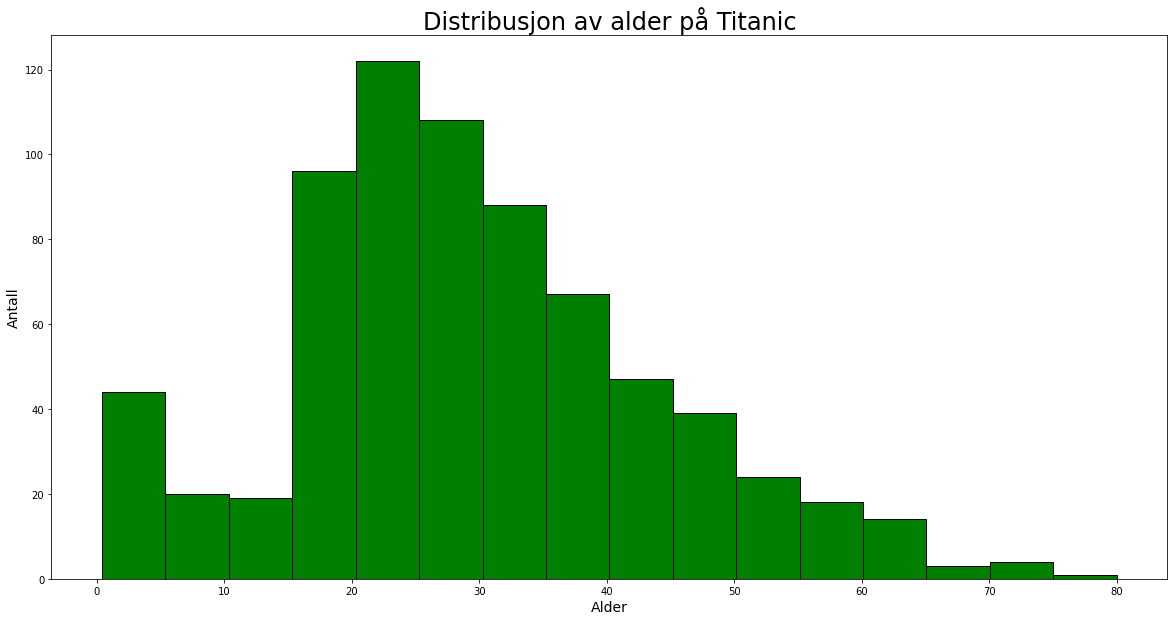

In [16]:
plt.figure(figsize=(20,10))
plt.hist(df2['Age'],  color = 'g', edgecolor = 'black',
         bins = int(16))
plt.title('Distribusjon av alder på Titanic', fontsize = 24)
plt.xlabel('Alder', fontsize = 14)
plt.ylabel('Antall', fontsize = 14)

Text(0, 0.5, 'Fare')

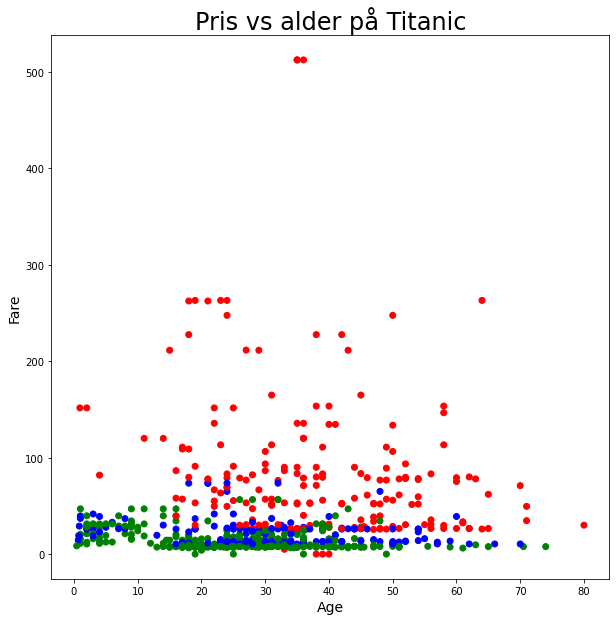

In [17]:
x=df2['Age']
y=df2['Fare']
colors = {'1':'red', '2':'blue', '3':'green'}

plt.figure(figsize=(10,10))
plt.scatter(x, y, color=df2['Pclass'].apply(lambda x: colors[x]))
plt.title('Pris vs alder på Titanic', fontsize = 24)
plt.xlabel('Age', fontsize = 14)
plt.ylabel('Fare', fontsize = 14)

Text(0, 0.5, 'Fare')

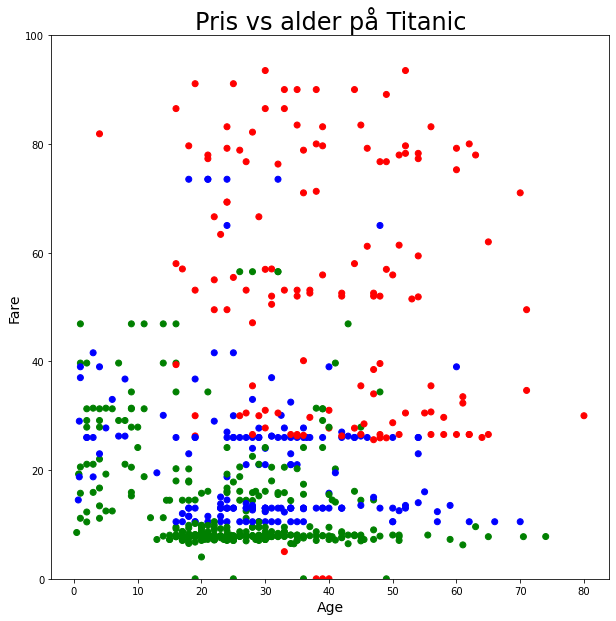

In [18]:
x=df2['Age']
y=df2['Fare']
colors = {'1':'red', '2':'blue', '3':'green'}

plt.figure(figsize=(10,10))
plt.scatter(x, y, color=df2['Pclass'].apply(lambda x: colors[x]))
plt.ylim(0,100)
plt.title('Pris vs alder på Titanic', fontsize = 24)
plt.xlabel('Age', fontsize = 14)
plt.ylabel('Fare', fontsize = 14)

In [19]:
colors = {'1':'red', '2':'blue', '3':'green'}

In [20]:
colors['1']

'red'

In [21]:
color=df2['Pclass'].apply(lambda x: colors[x])
color.head()

0    green
1      red
2    green
3      red
4    green
Name: Pclass, dtype: object

## Regresjonsanalyser

En vanlig oppgave for statistikkproduksjoen er utviklingen av modeller og evaluering av disse modellene. 
En grunn til at Python har blitt populært som statistisk programeringsspråk er interssen språket fanget for maskinlæring og kunstig intelligens.

Men når man går til bunns i både maskinlæring og kunstig inteligens er det til syvende og sist bare avanserte statistiske modeller.

I interessen av og holde dette enkelt og kort, skal vi her bare se på en lineær regresjon. 
Biblioteket `sklearn` eller scikit-learn ineholder en rekke fuksjoner som egner seg til modelbygging og evaluering.

In [22]:
 from sklearn.linear_model import LinearRegression

Over er en alternativ form for å importere biblioteker. 
Her lastes inn en spesifikk funksjon fra et større bibliotek. i dette tilfellet `LinearRegression` fra `sklearn` bibliotekets sammling med `linear_model`er.

Som med alle regresjonsanalyser så trenger vi å spessifisere modellen vi skal bruke. det er i grunn ikke noe nytt her ifra det dere har lært tidligere. 

Navnene på variabelene er primært tradisjon, og kan egentlig endres til det en vil.

Noen nye ting imidlertid:
* `.fillna()` - denne funksjonen tar alle tomme celler i dataen og fyllre det med innholet i parantesen.
* `pd.get_dummies(Datasett)` - Dett er en funksjon i Pandas biblioteket som tar alle kategoriske variabler og lager dummy variabler til disse. Den er imidertid også avansert nok til ikke å lage dummier av ekte numeriske verdier

In [23]:
y = df2['Fare'].fillna(0.0)
x= df2[['Pclass', 'Sex', 'Embarked', 'cabin_level', 'Title', 'Age', 'dist_age']].fillna(0.0)
x = pd.get_dummies(x)
x.head()

,Age,dist_age,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_0.0,Embarked_C,Embarked_Q,...,cabin_level_93,cabin_level_94,cabin_level_95,cabin_level_96,cabin_level_99,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,22.0,-3.140620,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38.0,-0.233441,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,26.0,0.859380,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,35.0,-3.233441,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,35.0,9.859380,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Etter å ha etablert dataene vi skal bruke i modellen lager vi selve modellen, denne lagres i et eget objekt. 
Dette gjør vi fordi i Python så lagres alt dette i minne på maskinen, det gjør det mulig og raskt gjøre ytterlige beregninger på modelen. 

In [24]:
reg = LinearRegression().fit(x,y)

In [25]:
x.columns

Index(['Age', 'dist_age', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female',
       'Sex_male', 'Embarked_0.0', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'cabin_level_0.0', 'cabin_level_', 'cabin_level_ E', 'cabin_level_ G',
       'cabin_level_10', 'cabin_level_11', 'cabin_level_12', 'cabin_level_14',
       'cabin_level_15', 'cabin_level_16', 'cabin_level_17', 'cabin_level_18',
       'cabin_level_19', 'cabin_level_2', 'cabin_level_20', 'cabin_level_21',
       'cabin_level_22', 'cabin_level_23', 'cabin_level_24', 'cabin_level_25',
       'cabin_level_26', 'cabin_level_28', 'cabin_level_3', 'cabin_level_30',
       'cabin_level_31', 'cabin_level_32', 'cabin_level_33', 'cabin_level_34',
       'cabin_level_35', 'cabin_level_36', 'cabin_level_37', 'cabin_level_38',
       'cabin_level_39', 'cabin_level_4', 'cabin_level_40', 'cabin_level_41',
       'cabin_level_42', 'cabin_level_44', 'cabin_level_45', 'cabin_level_46',
       'cabin_level_47', 'cabin_level_48', 'cabin_level_49', 

In [26]:
reg.coef_

array([ 2.16276616e-01, -5.11088836e-01,  4.13851041e+12,  4.13851041e+12,
        4.13851041e+12, -3.87234889e+11, -3.87234889e+11,  4.00782865e+12,
        4.00782865e+12,  4.00782865e+12,  4.00782865e+12, -1.13153820e+11,
       -1.13153820e+11, -1.13153820e+11, -1.13153820e+11, -1.13153820e+11,
       -1.13153820e+11, -1.13153820e+11, -1.13153820e+11, -1.13153820e+11,
       -1.13153820e+11, -1.13153820e+11, -1.13153820e+11, -1.13153820e+11,
       -1.13153820e+11, -1.13153820e+11, -1.13153820e+11, -1.13153820e+11,
       -1.13153820e+11, -1.13153820e+11, -1.13153820e+11, -1.13153820e+11,
       -1.13153820e+11, -1.13153820e+11, -1.13153820e+11, -1.13153820e+11,
       -1.13153820e+11, -1.13153820e+11, -1.13153820e+11, -1.13153820e+11,
       -1.13153820e+11, -1.13153820e+11, -1.13153820e+11, -1.13153820e+11,
       -1.13153820e+11, -1.13153820e+11, -1.13153820e+11, -1.13153820e+11,
       -1.13153820e+11, -1.13153820e+11, -1.13153820e+11, -1.13153820e+11,
       -1.13153820e+11, -

In [27]:
rdf = pd.DataFrame({'kolonne':x.columns, 'koef':reg.coef_})

In [28]:
rdf.head()

,kolonne,koef
0,Age,2.162766e-01
1,dist_age,-5.110888e-01
2,Pclass_1,4.138510e+12
3,Pclass_2,4.138510e+12
4,Pclass_3,4.138510e+12


### SAS-filer

Pandas klarer også å lese SAS-filer, med funksjonen `pd.read_sas()`

In [29]:
# pd.read_sas('datasett.sas7bdat')

In [30]:
print(reg.intercept_)

-4740368537371.428


In [31]:
print(reg.score(x,y))

0.5973648912668129


# Avslutningsvis



Dette har vært en kort gjennomgang av funksjoner og bibliotek som er egnet for dataanalyse. Python brukes til veldig mye forskjellig, alt fra å lage nettsider til å programmere fysiske roboter. Følgelig finner du mye informasjon på nettet, og det kan lønne seg å søke spesifikt på python for dataanalyse heller enn bare python.